#### Mrinal Bhan
#### DSAI 211020428


Write a program to perform the following operation on images:<br>
a) Image Fusion <br>
b) Overlapping of images<br>
c) Separate the two images.<br>

### Image Fusion

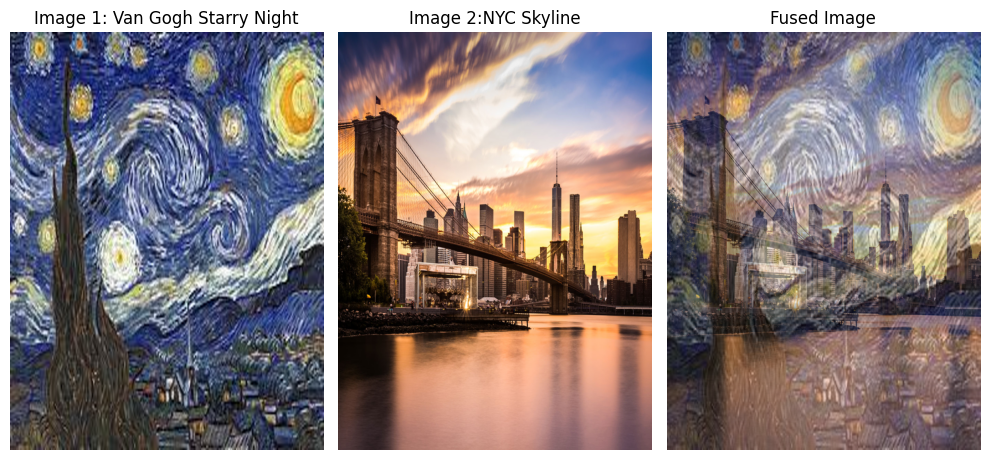

In [12]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

# Load the two input images from file paths
image_path1 = r"C:\Users\Mrinal Bhan\College\Sem 5\CV\starry_night.jpeg"
image_path2 = r"C:\Users\Mrinal Bhan\College\Sem 5\CV\manhattan.jpg"
    
image1 = Image.open(image_path1)
image2 = Image.open(image_path2)

# Resize the images to the desired dimensions
desired_width = 600
desired_height = 800
image1 = image1.resize((desired_width, desired_height))
image2 = image2.resize((desired_width, desired_height))

# Convert PIL Images to NumPy arrays for image fusion
image1_np = np.array(image1)
image2_np = np.array(image2)

# Perform image fusion using a simple averaging method
fused_image = cv2.addWeighted(image1_np, 0.5, image2_np, 0.5, 0)

# Display the images using Matplotlib subplots
plt.figure(figsize=(10, 8))

# Original Image 1
plt.subplot(131)
plt.imshow(image1)
plt.title('Image 1: Van Gogh Starry Night')
plt.axis('off')

# Original Image 2
plt.subplot(132)
plt.imshow(image2)
plt.title('Image 2:NYC Skyline')
plt.axis('off')

# Fused Image
plt.subplot(133)
plt.imshow(fused_image)
plt.title('Fused Image')
plt.axis('off')

plt.tight_layout()
plt.show()

### Image Overlap

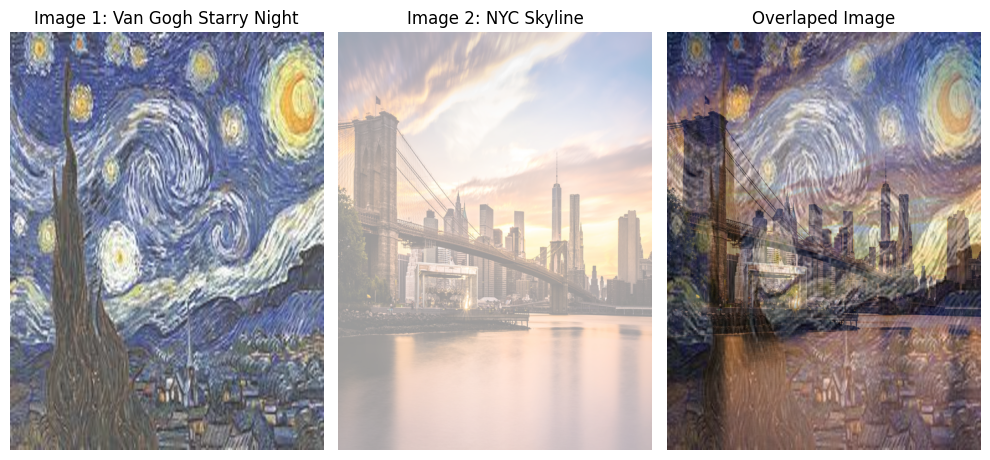

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

# Load the two input images from file paths
image_path1 = r"C:\Users\Mrinal Bhan\College\Sem 5\CV\starry_night.jpeg"
image_path2 = r"C:\Users\Mrinal Bhan\College\Sem 5\CV\manhattan.jpg"
    
image1 = Image.open(image_path1).convert('RGBA')
image2 = Image.open(image_path2).convert('RGBA')

# Resize the images to the desired dimensions
desired_width = 600
desired_height = 800
image1 = image1.resize((desired_width, desired_height))
image2 = image2.resize((desired_width, desired_height))

image1.putalpha(200)
image2.putalpha(100)

overlap_image = Image.new('RGBA', (desired_width, desired_height), (0, 0, 0, 0))

# Paste the first image onto the overlap image
overlap_image.paste(image1, (0, 0), image1)

# Paste the second image onto the overlap image with transparency
overlap_image.paste(image2, (0, 0), image2)

# Display the images using Matplotlib subplots
plt.figure(figsize=(10, 8))

# Original Image 1
plt.subplot(131)
plt.imshow(image1)
plt.title('Image 1: Van Gogh Starry Night')
plt.axis('off')

# Original Image 2
plt.subplot(132)
plt.imshow(image2)
plt.title('Image 2: NYC Skyline')
plt.axis('off')

# Fused Image
plt.subplot(133)
plt.imshow(fused_image)
plt.title('Overlaped Image')
plt.axis('off')

plt.tight_layout()
plt.show()


### Image Seperation

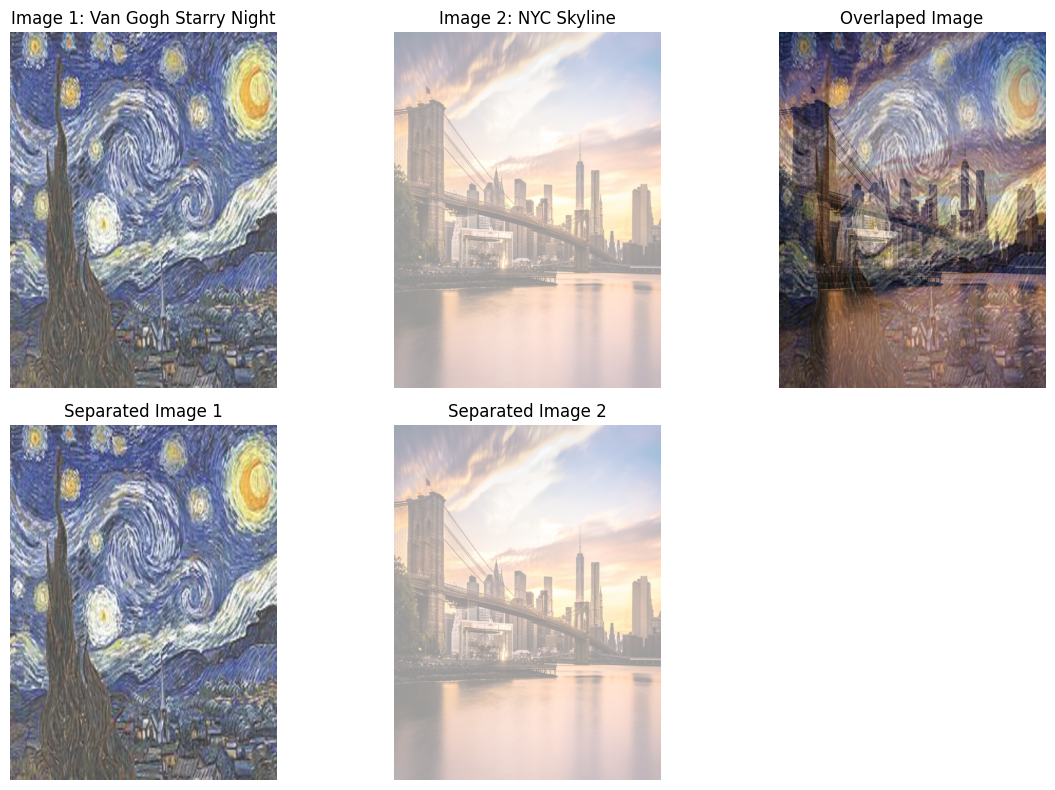

In [10]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the two input images from file paths
image_path1 = r"C:\Users\Mrinal Bhan\College\Sem 5\CV\starry_night.jpeg"
image_path2 = r"C:\Users\Mrinal Bhan\College\Sem 5\CV\manhattan.jpg"
    
image1 = Image.open(image_path1).convert('RGBA')
image2 = Image.open(image_path2).convert('RGBA')


# Resize the images to the desired dimensions
desired_width = 600
desired_height = 800
image1 = image1.resize((desired_width, desired_height))
image2 = image2.resize((desired_width, desired_height))

image1.putalpha(200)
image2.putalpha(100)

overlap_image = Image.new('RGBA', (desired_width, desired_height), (0, 0, 0, 0))

# Paste the first image onto the overlap image
overlap_image.paste(image1, (0, 0), image1)

# Paste the second image onto the overlap image with transparency
overlap_image.paste(image2, (0, 0), image2)

# Convert the overlap_image to a NumPy array
overlap_array = np.array(overlap_image)

# Get dimensions of the image
height, width, _ = overlap_array.shape

# Create a mask for image 1 (where alpha channel >= 200)
image1_mask = overlap_array[:, :, 2] >= 66

# Create separate NumPy arrays for image 1 and image 2
image1_array = np.zeros_like(overlap_array)
image2_array = np.zeros_like(overlap_array)

# Apply the mask to separate the images
image1_array[image1_mask] = overlap_array[image1_mask]
image2_array[~image1_mask] = overlap_array[~image1_mask]

# Convert the NumPy arrays back to Pillow images
separated_image1 = Image.fromarray(image1_array, 'RGBA')
separated_image2 = Image.fromarray(image2_array, 'RGBA')

# Display the images using Matplotlib subplots
plt.figure(figsize=(12, 8))

# Original Image 1
plt.subplot(231)
plt.imshow(image1)
plt.title('Image 1: Van Gogh Starry Night')
plt.axis('off')

# Original Image 2
plt.subplot(232)
plt.imshow(image2)
plt.title('Image 2: NYC Skyline')
plt.axis('off')

# Fused Image
plt.subplot(233)
plt.imshow(fused_image)
plt.title('Overlaped Image')
plt.axis('off')

# Separated Image 1
plt.subplot(234)
plt.imshow(image1)
plt.title('Separated Image 1')
plt.axis('off')

# Separated Image 2
plt.subplot(235)
plt.imshow(image2)
plt.title('Separated Image 2')
plt.axis('off')

plt.tight_layout()
plt.show()
